<a href="https://colab.research.google.com/github/marziye-jalili/deep_learning/blob/main/Pima_Indians_Diabetes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load libraries

In [1]:
# Helper functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import metrics
# Winsorization
from scipy.stats.mstats import winsorize
# Normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Encoding
from sklearn.preprocessing import LabelEncoder
# PCA
from sklearn.decomposition import PCA
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Data splitting
from sklearn.model_selection import train_test_split
# Linear and Logistic Regression
from sklearn.linear_model import LinearRegression, LogisticRegression
# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

#Read data

In [2]:
data = pd.read_csv('/content/veri-seti.csv')
print('Done!')

Done!


#**Data Analysis**

In [3]:
#data.head(10)
print(data.head(10).to_markdown(index=False))

|   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |   Insulin |   BMI |   DiabetesPedigreeFunction |   Age |   Outcome |
|--------------:|----------:|----------------:|----------------:|----------:|------:|---------------------------:|------:|----------:|
|             6 |       148 |              72 |              35 |         0 |  33.6 |                      0.627 |    50 |         1 |
|             1 |        85 |              66 |              29 |         0 |  26.6 |                      0.351 |    31 |         0 |
|             8 |       183 |              64 |               0 |         0 |  23.3 |                      0.672 |    32 |         1 |
|             1 |        89 |              66 |              23 |        94 |  28.1 |                      0.167 |    21 |         0 |
|             0 |       137 |              40 |              35 |       168 |  43.1 |                      2.288 |    33 |         1 |
|             5 |       116 |              74 |        

In [4]:
data.shape

(768, 9)

In [5]:
data.rename(columns = {'DiabetesPedigreeFunction':'DPF',}, inplace = True)
data.rename(columns = {'BloodPressure':'BP','SkinThickness': 'SkinTh'}, inplace = True)

In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  768 non-null    int64  
 1   Glucose      768 non-null    int64  
 2   BP           768 non-null    int64  
 3   SkinTh       768 non-null    int64  
 4   Insulin      768 non-null    int64  
 5   BMI          768 non-null    float64
 6   DPF          768 non-null    float64
 7   Age          768 non-null    int64  
 8   Outcome      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


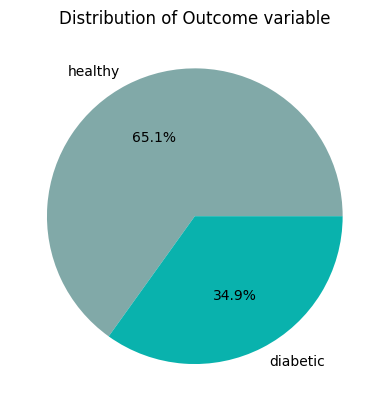

Outcome
0    500
1    268
dtype: int64

In [7]:
colors = ['#81a9a8', '#09b2ad']

# Pie chart
plt.pie(data['Outcome'].value_counts(), labels=['healthy', 'diabetic'], autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Outcome variable')
plt.show()
data.groupby("Outcome").size()

###`The above graph shows that the data is unbalanced`

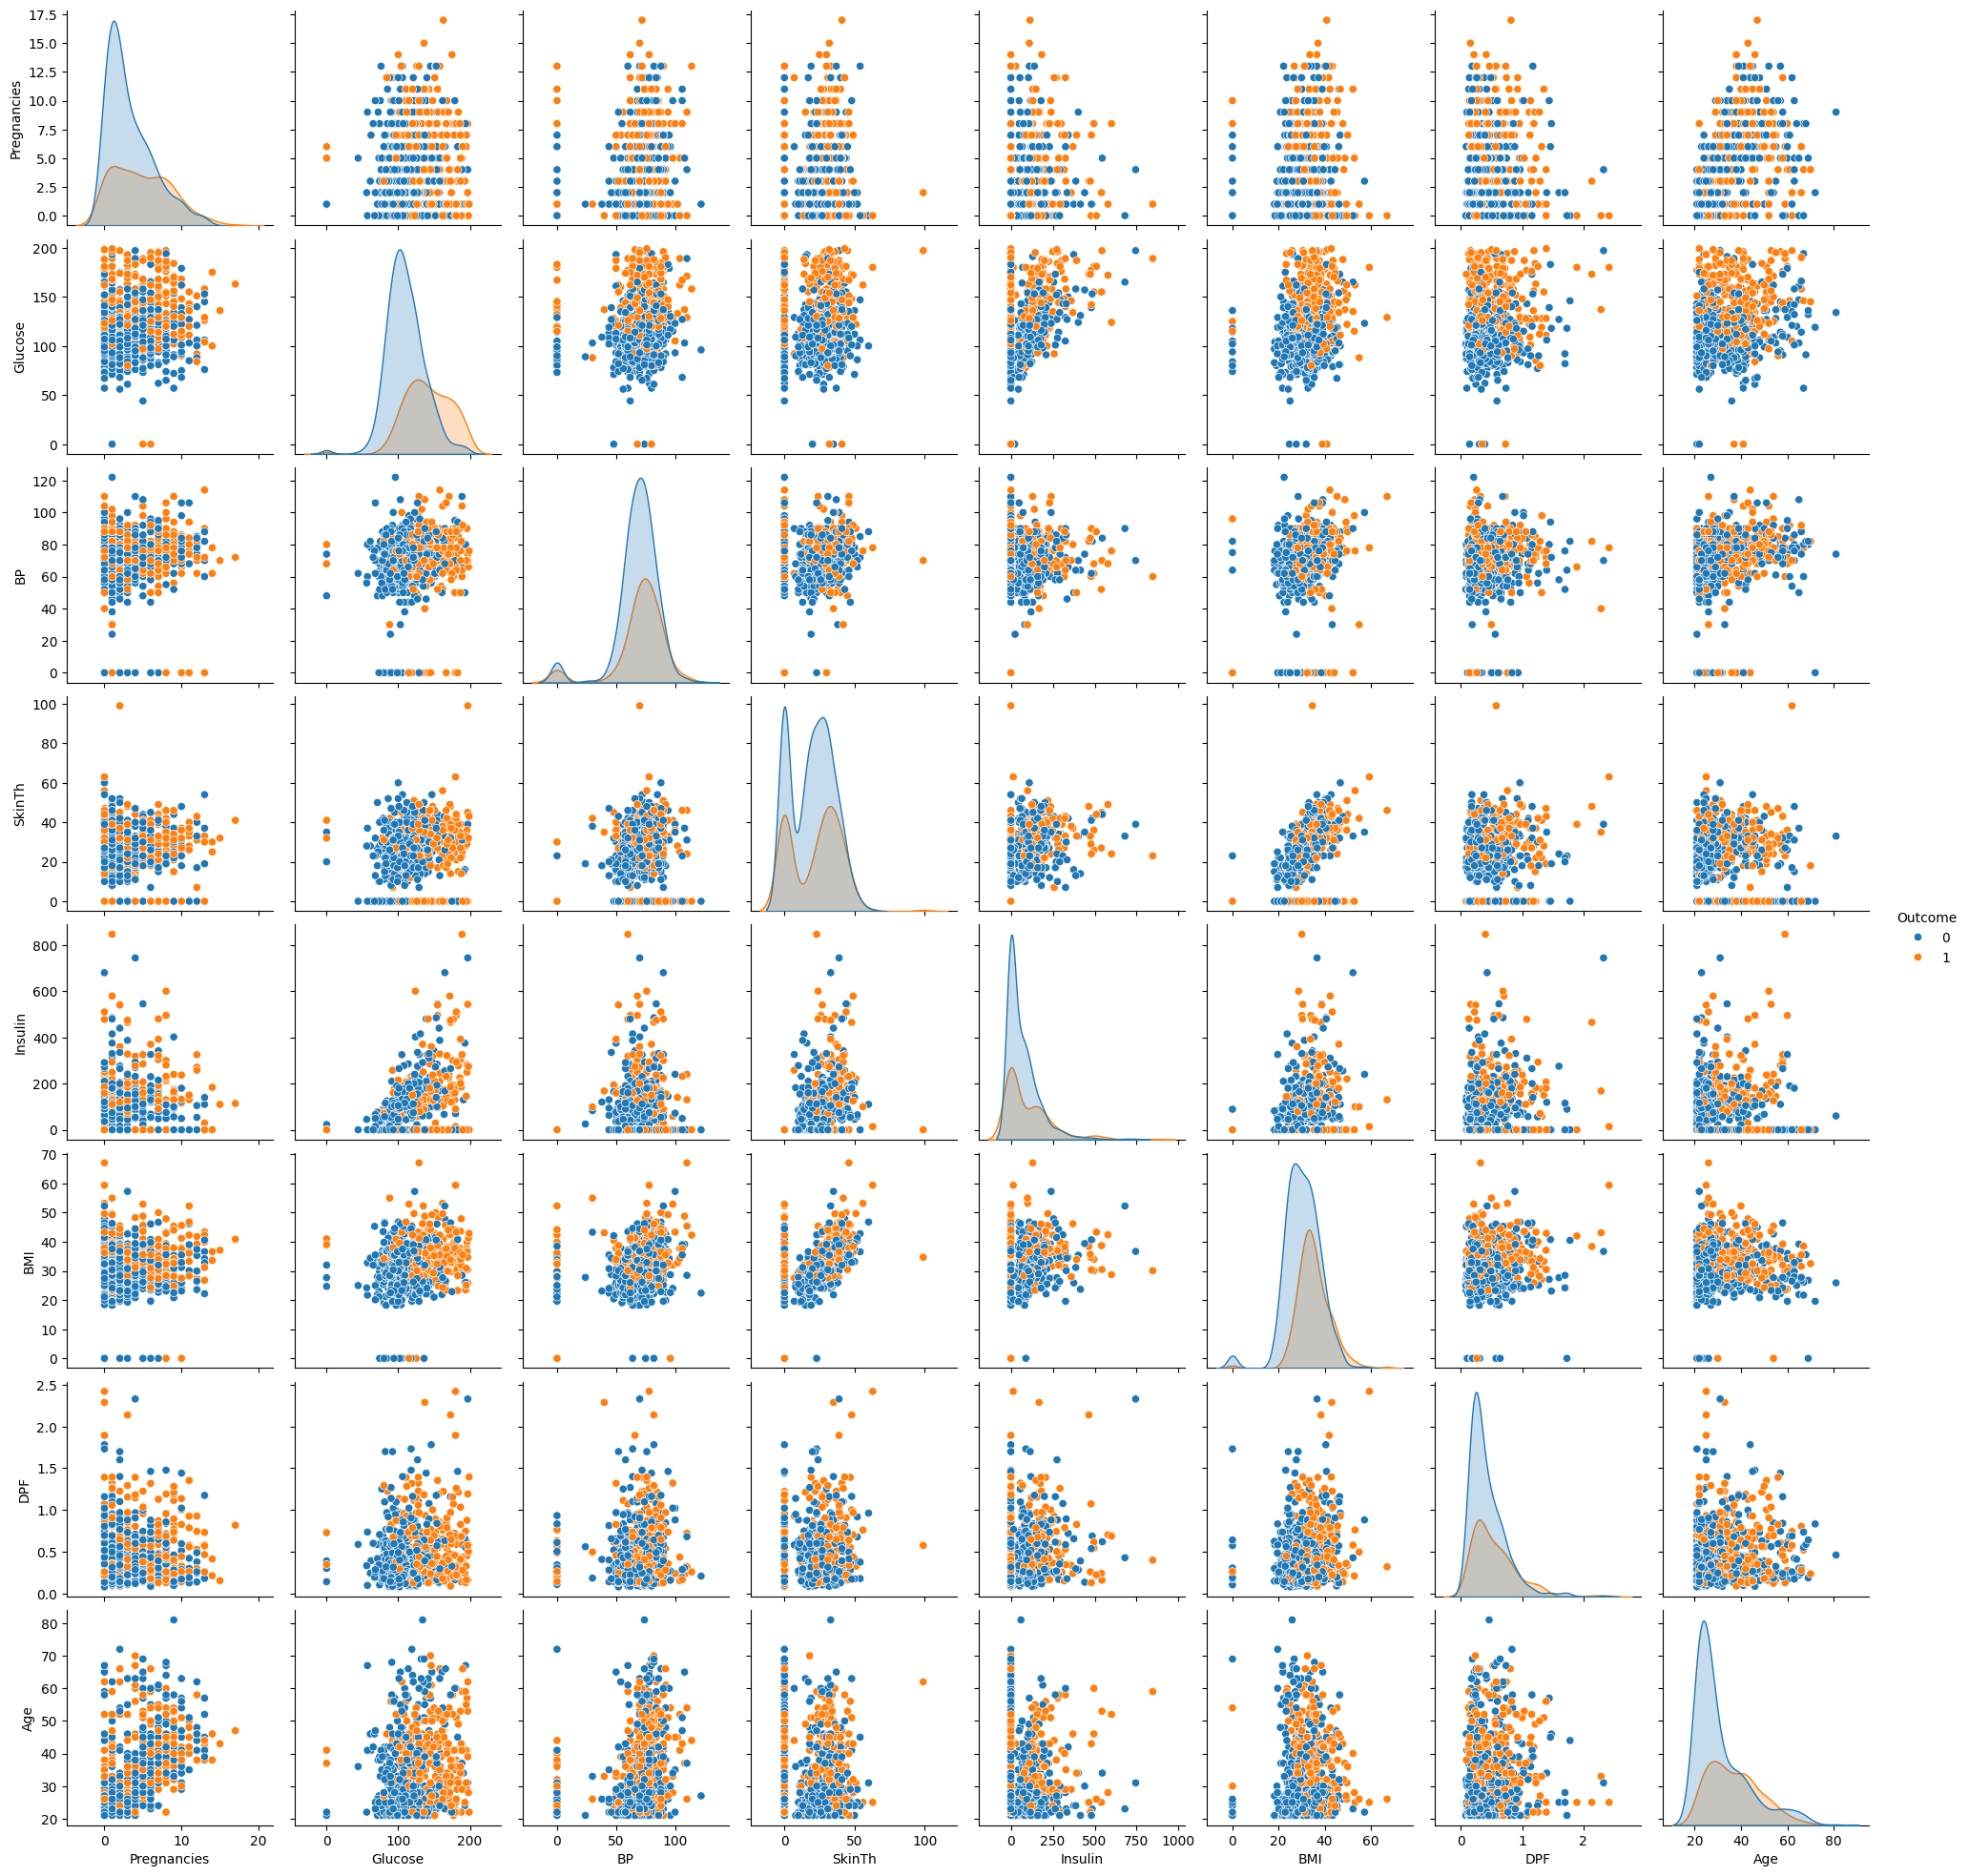

In [8]:
#Pair plot
sns.pairplot(data, hue = 'Outcome')

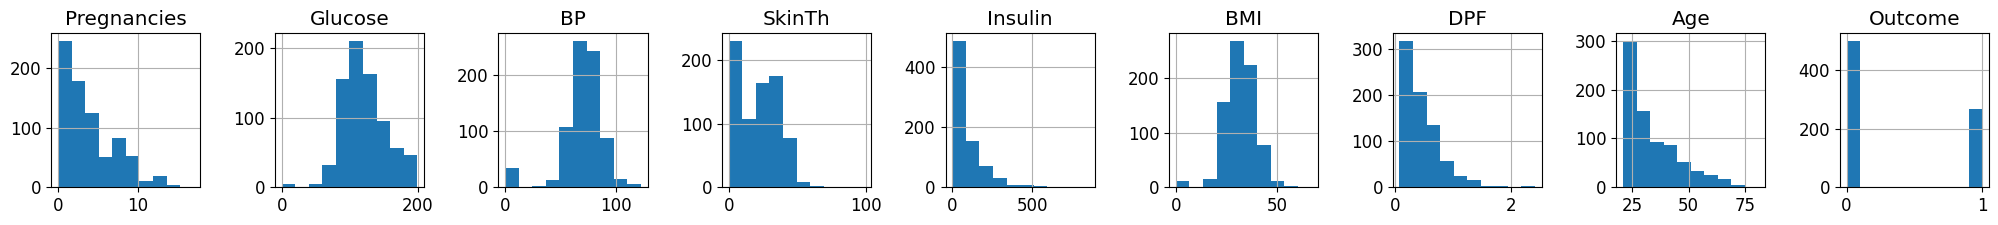

In [9]:
plt.rcParams.update({'font.size': 12})
data.hist(figsize=(25, 2), layout=(1, 9))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
plt.show()

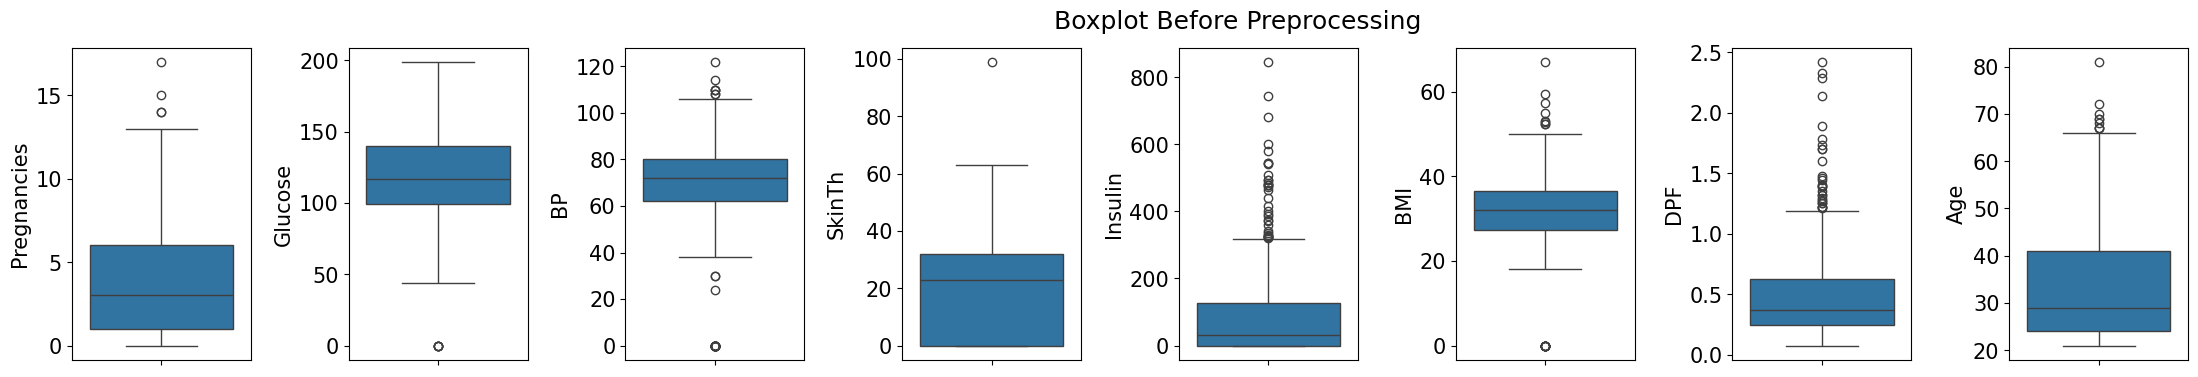

In [10]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(25, 4))
for i, col in enumerate(data.columns):
    if col != 'Outcome':
        plt.subplot(1, 9, i + 1)
        sns.boxplot(y=data[col], data=data)
        plt.ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Boxplot Before Preprocessing', fontsize=18)
plt.show()


##Checking , Removing Outliersand and Normalizing the Dataset

In [11]:
#data.describe().T
print(data.describe().transpose().to_markdown())

|             |   count |       mean |        std |    min |      25% |      50% |       75% |    max |
|:------------|--------:|-----------:|-----------:|-------:|---------:|---------:|----------:|-------:|
| Pregnancies |     768 |   3.84505  |   3.36958  |  0     |  1       |   3      |   6       |  17    |
| Glucose     |     768 | 120.895    |  31.9726   |  0     | 99       | 117      | 140.25    | 199    |
| BP          |     768 |  69.1055   |  19.3558   |  0     | 62       |  72      |  80       | 122    |
| SkinTh      |     768 |  20.5365   |  15.9522   |  0     |  0       |  23      |  32       |  99    |
| Insulin     |     768 |  79.7995   | 115.244    |  0     |  0       |  30.5    | 127.25    | 846    |
| BMI         |     768 |  31.9926   |   7.88416  |  0     | 27.3     |  32      |  36.6     |  67.1  |
| DPF         |     768 |   0.471876 |   0.331329 |  0.078 |  0.24375 |   0.3725 |   0.62625 |   2.42 |
| Age         |     768 |  33.2409   |  11.7602   | 21     | 24 

######Replace missing values with the median for 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'

In [12]:
# Copy data to preserve the original
data_copy = data.copy()
data_copy[['Glucose', 'BP', 'SkinTh', 'Insulin', 'BMI']] = data_copy[['Glucose', 'BP', 'SkinTh', 'Insulin', 'BMI']].replace(0, np.nan)
print(data_copy.isnull().sum())

Pregnancies      0
Glucose          5
BP              35
SkinTh         227
Insulin        374
BMI             11
DPF              0
Age              0
Outcome          0
dtype: int64


In [13]:
data_copy.fillna(data_copy.median(), inplace=True)
print(data_copy.describe().transpose().to_markdown())

|             |   count |       mean |       std |    min |       25% |      50% |       75% |    max |
|:------------|--------:|-----------:|----------:|-------:|----------:|---------:|----------:|-------:|
| Pregnancies |     768 |   3.84505  |  3.36958  |  0     |   1       |   3      |   6       |  17    |
| Glucose     |     768 | 121.656    | 30.4383   | 44     |  99.75    | 117      | 140.25    | 199    |
| BP          |     768 |  72.3867   | 12.0966   | 24     |  64       |  72      |  80       | 122    |
| SkinTh      |     768 |  29.1081   |  8.79122  |  7     |  25       |  29      |  32       |  99    |
| Insulin     |     768 | 140.672    | 86.3831   | 14     | 121.5     | 125      | 127.25    | 846    |
| BMI         |     768 |  32.4552   |  6.87518  | 18.2   |  27.5     |  32.3    |  36.6     |  67.1  |
| DPF         |     768 |   0.471876 |  0.331329 |  0.078 |   0.24375 |   0.3725 |   0.62625 |   2.42 |
| Age         |     768 |  33.2409   | 11.7602   | 21     |  24 

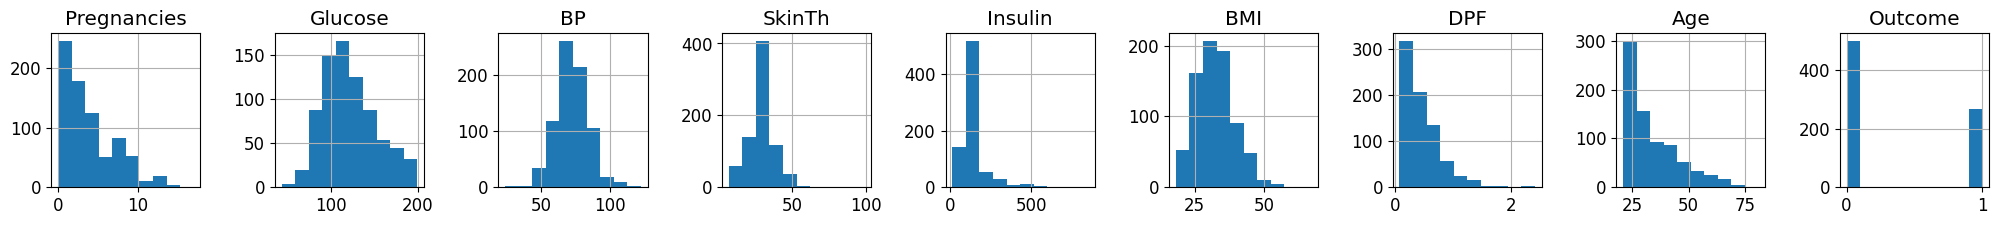

In [14]:
plt.rcParams.update({'font.size': 12})
data_copy.hist(figsize=(25, 2), layout=(1, 9))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
plt.show()

#####Removing Outliersand and Normalizing the Dataset

In [15]:
X = pd.DataFrame(data_copy.drop(["Outcome"],axis = 1),)
y = data_copy.Outcome

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)
print(data_scaled.describe().transpose().to_markdown())

|             |   count |         mean |     std |      min |       25% |        50% |       75% |     max |
|:------------|--------:|-------------:|--------:|---------:|----------:|-----------:|----------:|--------:|
| Pregnancies |     768 | -6.4763e-17  | 1.00065 | -1.14185 | -0.844885 | -0.250952  |  0.639947 | 3.90658 |
| Glucose     |     768 |  4.62593e-18 | 1.00065 | -2.55293 | -0.720163 | -0.153073  |  0.611265 | 2.54266 |
| BP          |     768 |  5.78241e-18 | 1.00065 | -4.00262 | -0.693761 | -0.0319899 |  0.629782 | 4.10408 |
| SkinTh      |     768 | -1.52656e-16 | 1.00065 | -2.51643 | -0.467597 | -0.0123013 |  0.329171 | 7.95538 |
| Insulin     |     768 |  1.50343e-17 | 1.00065 | -1.46735 | -0.222085 | -0.181541  | -0.155477 | 8.17044 |
| BMI         |     768 |  2.61365e-16 | 1.00065 | -2.07478 | -0.721209 | -0.0225899 |  0.603256 | 5.0424  |
| DPF         |     768 |  2.45174e-16 | 1.00065 | -1.18955 | -0.688969 | -0.300128  |  0.466227 | 5.88356 |
| Age         |    

In [16]:
# Remove outliers using Winsorization method

data_scaled['Pregnancies'] = winsorize(data_scaled['Pregnancies'], limits=[0.001, 0.05])
data_scaled['Glucose'] = winsorize(data_scaled['Glucose'], limits=[0.001, 0.02])
data_scaled['BP'] = winsorize(data_scaled['BP'], limits=[0.06, 0.06])
data_scaled['SkinTh'] = winsorize(data_scaled['SkinTh'], limits=[0.051, 0.09])
data_scaled['Insulin'] = winsorize(data_scaled['Insulin'], limits=[0.23, 0.23])
data_scaled['BMI'] = winsorize(data_scaled['BMI'], limits=[0.05, 0.05])
data_scaled['DPF'] = winsorize(data_scaled['DPF'], limits=[0.00001, 0.05])
data_scaled['Age'] = winsorize(data_scaled['Age'], limits=[0.00001, 0.04])

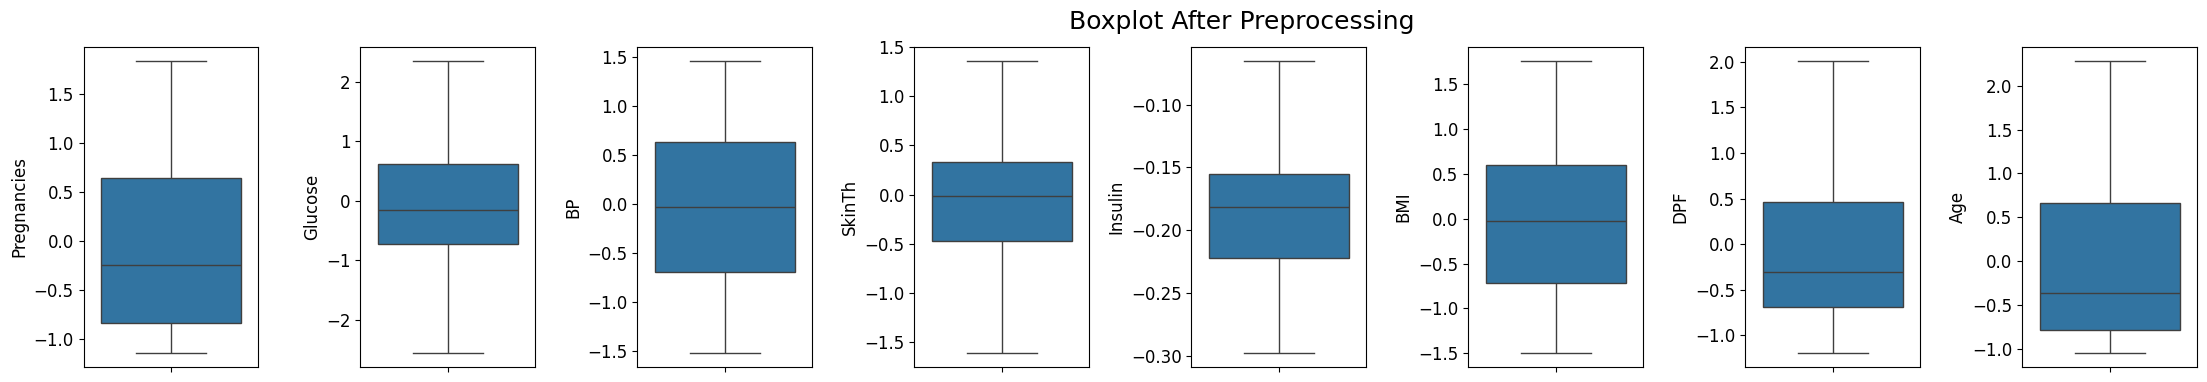

In [17]:
plt.figure(figsize=(25, 4))

for i, col in enumerate(data_scaled.columns):
    if col != 'Outcome':
        plt.subplot(1, 9, i + 1)
        sns.boxplot(y=data_scaled[col], data=data_scaled)
        plt.ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Boxplot After Preprocessing', fontsize=18)
plt.show()

#PCA and LDA

In [18]:
# Apply PCA
pca = PCA(n_components=2)
pca.fit(data_scaled)
pca_features = pca.transform(data_scaled)
pca_top_features = pca.components_

# Reporting
print("Top features for PCA:")
for i, feature in enumerate(pca_top_features):
    print(f"PC{i+1}: {X.columns[np.argmax(feature)]}")

print("Explained variance ratio of the first two components of PCA:")
print(pca.explained_variance_ratio_)

pca_components = pd.DataFrame(pca.components_, columns=data_scaled.columns)
print("\nPCA components:")
print(pca_components)

Top features for PCA:
PC1: Age
PC2: BMI
Explained variance ratio of the first two components of PCA:
[0.32358913 0.20680901]

PCA components:
   Pregnancies   Glucose        BP    SkinTh   Insulin       BMI       DPF  \
0     0.417696  0.449446  0.375980  0.303739  0.019888  0.333317  0.102347   
1    -0.490581  0.178525  0.051945  0.392302  0.009801  0.582976  0.191517   

        Age  
0  0.517630  
1 -0.440708  


In [19]:
# Initialize and fit LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(data_scaled, y)
lda_top_features = lda.coef_

# Reporting
print("Top features for LDA:")
for i, feature in enumerate(lda_top_features):
    print(f"LD{i+1}: {X.columns[np.argmax(feature)]}")

print("Explained variance ratio of LDA:")
print(lda.explained_variance_ratio_)

lda_components = pd.DataFrame(lda.scalings_.T, columns=data_scaled.columns)
print("\nLDA components:")
print(lda_components)

Top features for LDA:
LD1: Glucose
Explained variance ratio of LDA:
[1.]

LDA components:
   Pregnancies   Glucose        BP    SkinTh   Insulin       BMI       DPF  \
0       0.3102  0.844418 -0.080378  0.024396  0.816408  0.464265  0.273195   

        Age  
0  0.135672  


##Linear Regression and Logistic Regression

Coefficients of Multiple Linear Regression: [ 0.0255194   0.19251548 -0.02317748  0.00459852  0.25924809  0.11430958
  0.0325202   0.07850725]
Root Mean Squared Error (MLR): 0.4174177726417064
Accuracy (Logistic Regression): 0.7359307359307359


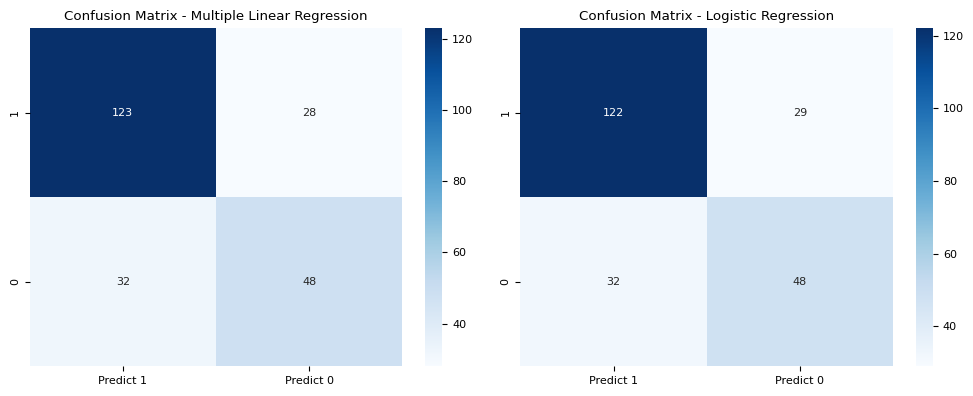

In [20]:
# Split the preprocessed data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.3, random_state=42)

# Apply Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_coef = mlr.coef_
print("Coefficients of Multiple Linear Regression:", mlr_coef)

# Apply Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', multi_class='auto')
log_reg.fit(X_train, y_train)

# Predictions for test set
mlr_predictions = mlr.predict(X_test)
log_reg_predictions = log_reg.predict(X_test)

# Calculate performance metrics for test set
mlr_rmse = np.sqrt(mean_squared_error(y_test, mlr_predictions))
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

print("Root Mean Squared Error (MLR):", mlr_rmse)
print("Accuracy (Logistic Regression):", log_reg_accuracy)

plt.rcParams.update({'font.size': 8})
# Calculate confusion matrices
conf_matrix_mlr = metrics.confusion_matrix(y_test, np.round(mlr_predictions))
conf_matrix_log_reg = metrics.confusion_matrix(y_test, log_reg_predictions)

# Plot confusion matrix for Linear Regression
df_cm_mlr = pd.DataFrame(conf_matrix_mlr, index=['1', '0'], columns=['Predict 1', 'Predict 0'])

# Plot confusion matrix for Logistic Regression
df_cm_log_reg = pd.DataFrame(conf_matrix_log_reg, index=['1', '0'], columns=['Predict 1', 'Predict 0'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot confusion matrix for Linear Regression
sns.heatmap(df_cm_mlr, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title("Confusion Matrix - Multiple Linear Regression")

# Plot confusion matrix for Logistic Regression
sns.heatmap(df_cm_log_reg, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title("Confusion Matrix - Logistic Regression")

plt.tight_layout()
plt.show()


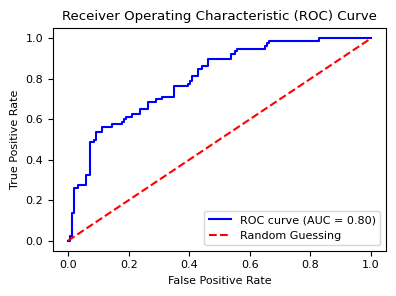

In [21]:
# Calculate probabilities for Logistic Regression
log_reg_probs = log_reg.predict_proba(X_test)
log_reg_probs = log_reg_probs[:, 1]  # Keep probabilities for the positive outcome only

fpr, tpr, thresholds = metrics.roc_curve(y_test, log_reg_probs)

auc_score = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# Calculate classification reports
mlr_classification_report = classification_report(y_test, np.round(mlr_predictions))
log_reg_classification_report = classification_report(y_test, log_reg_predictions)

print("Classification Report - Multiple Linear Regression:\n", mlr_classification_report)
print("Classification Report - Logistic Regression:\n", log_reg_classification_report)


Classification Report - Multiple Linear Regression:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.62      0.60      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.73      0.74      0.73       231



Accuracy (Decision Tree Classifier): 0.7142857142857143


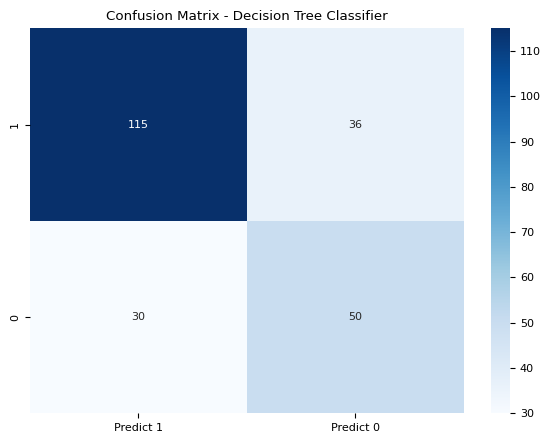

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Apply Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predictions for test set
dt_predictions = dt_classifier.predict(X_test)

# Calculate performance metrics for test set
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Accuracy (Decision Tree Classifier):", dt_accuracy)

# Plot confusion matrix for Decision Tree Classifier
conf_matrix_dt = metrics.confusion_matrix(y_test, dt_predictions)
df_cm_dt = pd.DataFrame(conf_matrix_dt, index=['1', '0'], columns=['Predict 1', 'Predict 0'])

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm_dt, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()


In [24]:
# Calculate classification report for Decision Tree Classifier
dt_classification_report = classification_report(y_test, dt_predictions)
print("Classification Report - Decision Tree Classifier:\n", dt_classification_report)

Classification Report - Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       151
           1       0.58      0.62      0.60        80

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.71      0.72       231



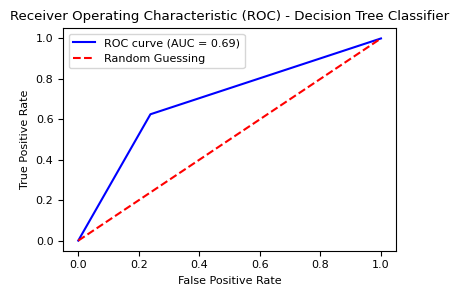

In [26]:
from sklearn.metrics import roc_curve, auc

dt_probs = dt_classifier.predict_proba(X_test)
dt_probs = dt_probs[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(figsize=(4, 3))
plt.plot(fpr_dt, tpr_dt, color='blue', label='ROC curve (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Decision Tree Classifier')
plt.legend()
plt.tight_layout()
plt.show()

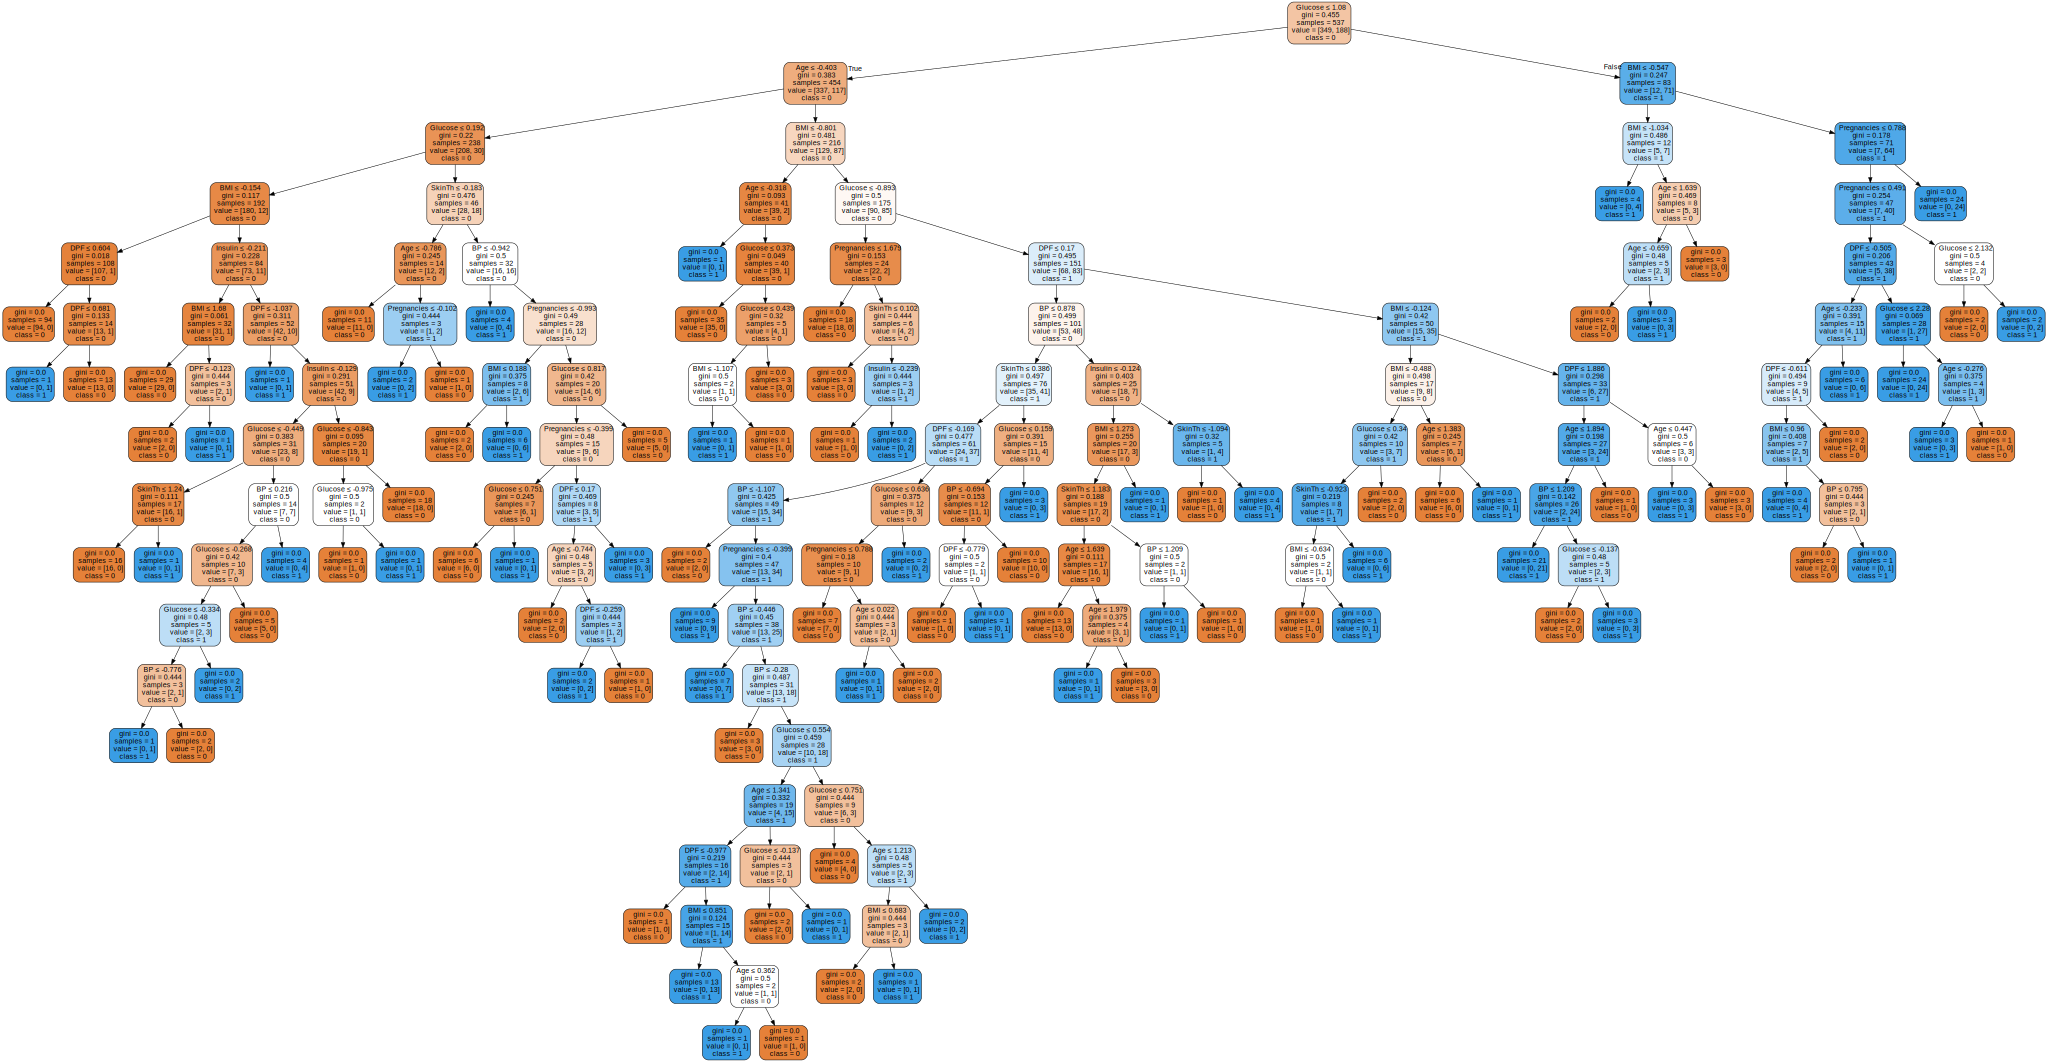

In [28]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT file
dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=X.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
# Display the decision tree
graph

In [29]:
from sklearn.naive_bayes import GaussianNB

# Apply Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predictions for test set
nb_predictions = nb_classifier.predict(X_test)

# Calculate performance metrics for test set
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("Accuracy (Naive Bayes):", nb_accuracy)

Accuracy (Naive Bayes): 0.6883116883116883


In [30]:
# Calculate classification report for Naive Bayes Classifier
nb_classification_report = classification_report(y_test, nb_predictions)
print("Classification Report - Naive Bayes Classifier:\n", nb_classification_report)

Classification Report - Naive Bayes Classifier:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       151
           1       0.54      0.61      0.58        80

    accuracy                           0.69       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.70      0.69      0.69       231



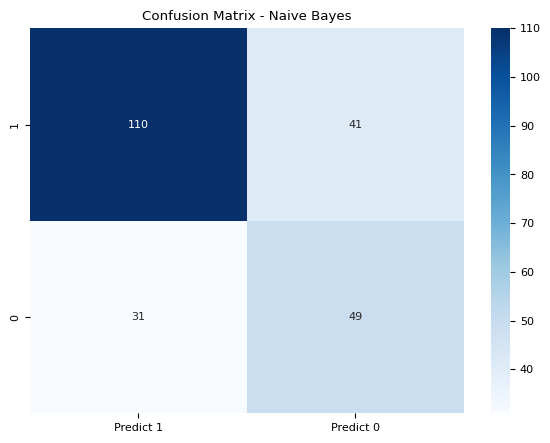

In [31]:
# Calculate confusion matrix for Naive Bayes
conf_matrix_nb = metrics.confusion_matrix(y_test, nb_predictions)

# Plot confusion matrix for Naive Bayes
df_cm_nb = pd.DataFrame(conf_matrix_nb, index=['1', '0'], columns=['Predict 1', 'Predict 0'])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm_nb, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


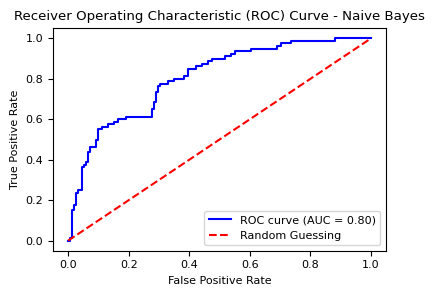

In [33]:
# Calculate probabilities for Naive Bayes
nb_probs = nb_classifier.predict_proba(X_test)
nb_probs = nb_probs[:, 1]  # Keep probabilities for the positive outcome only

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_probs)
auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve for Naive Bayes
plt.figure(figsize=(4, 3))
plt.plot(fpr_nb, tpr_nb, color='blue', label='ROC curve (AUC = {:.2f})'.format(auc_nb))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend()
plt.tight_layout()
plt.show()